In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

2023-09-19 16:35:25.726495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# save the figure
flag_save = False

In [3]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-09-12_17-01-56_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn-all
2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog
2023-09-12_22-17-04_all


## Loading info

In [4]:
# NN
dir_nn2 = "2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

## LIN LOG
dir_linlog = "2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog"

### NN2

In [5]:
path = target_dir + dir_nn2
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN2 - Jupyter Notebook.pdf
info_nn2.txt


In [6]:
namefile_nn2 = "/info_nn2.txt"

In [7]:
# Construct a list for header
with open(path + namefile_nn2) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [8]:
info_nn2 = pd.read_csv(path + namefile_nn2, sep=',', usecols= header)

### NN4

In [9]:
path = target_dir + dir_nn4
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN4 - Jupyter Notebook.pdf
info_nn4.txt


In [10]:
namefile_nn4 = "/info_nn4.txt"

In [11]:
# Construct a list for header
with open(path + namefile_nn4) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [12]:
info_nn4 = pd.read_csv(path + namefile_nn4, sep=',', usecols= header)

### NN10

In [13]:
path = target_dir + dir_nn10
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN10 - Jupyter Notebook.pdf
info_nn10.txt


In [14]:
namefile_nn10 = "/info_nn10.txt"

In [15]:
# Construct a list for header
with open(path + namefile_nn10) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [16]:
info_nn10 = pd.read_csv(path + namefile_nn10, sep=',', usecols= header)

### NN info

In [17]:
# For better handling the plot
info_nn = pd.concat([info_nn2, info_nn4, info_nn10])

In [18]:
info_nn

,t_list,x_list,v_list,v0_scn,v0_scn_mean,n_scn,N. file,iter,DOE,processed
0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[array([ 6.54115583, 8.0897421 , 9.63832837,...","[[30.971725463867188, 32.08132717666523], [30....","[30, 30.104066362420156, 30.202929406719303, 3...",31.977261,0,1,400,"[1, 2, 1]",pre
1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[array([25.56044125, 26.97073063, 28.38102002,...","[[28.205787658691406, 25.679619644886028], [26...","[30, 29.74095849200289, 29.49486905940565, 29....",25.026403,1,1,500,"[1, 2, 1]",pre
2,"[33.440000000000005, 33.49, 33.540000000000006...","[array([29.01531893, 30.6172526 , 32.21918627,...","[[32.038673400878906, 22.440509214061304], [28...","[30, 29.536781199258378, 29.096723338553787, 2...",21.198843,2,1,400,"[1, 2, 1]",pre
3,"[37.440000000000005, 37.49, 37.540000000000006...","[array([42.18965274, 43.49722968, 44.80480662,...","[[26.151538848876953, 28.315899750277957], [25...","[30, 29.864762708290026, 29.736287281165527, 2...",27.403444,3,1,500,"[1, 2, 1]",pre
4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[array([43.43569439, 44.72745341, 46.01921242,...","[[25.835180282592773, 29.929341689114565], [26...","[30, 29.986663618744593, 29.973994056552012, 2...",29.743941,4,1,500,"[1, 2, 1]",pre
...,...,...,...,...,...,...,...,...,...,...
666,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 48.91024316, 49.40239833,...","[[9.843103408813477, 9.86316204071045, 22.6189...","[30, 29.753963886919543, 29.516128977608656, 2...",23.061782,69,10,500,"[1, 10, 1]",pre
667,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 41.88516262, 42.36294263,...","[[9.5556001663208, 8.86551570892334, 18.205181...","[30, 29.60683911392471, 29.226783590718448, 28...",18.912863,70,10,500,"[1, 10, 1]",pre
668,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.80624652, 31.20200878,...","[[27.915245056152344, 27.880136489868164, 28.1...","[30, 29.850353129658775, 29.704447431076076, 2...",24.492994,71,10,500,"[1, 10, 1]",pre
669,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 30.95975651, 31.75768213,...","[[15.958512306213379, 15.771443367004395, 15.9...","[30, 29.63678726055025, 29.282654839586684, 28...",16.633767,72,10,500,"[1, 10, 1]",pre


### Lin Log info

In [19]:
path = target_dir + dir_linlog
for name in sorted(os.listdir(path)):
    print(name)

info_data.txt
v0_df1-2-3-4-5-6-7-8-9-10_1.svg


In [20]:
namefile = '/info_data.txt'

In [21]:
# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [22]:
info_linlog = pd.read_csv(path + namefile, sep=',', usecols= header)

In [23]:
info_linlog

,t_list,x_list,v0_scn,L_scn,n_scn,N. file,LWR_flag,processed
0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[array([ 6.54115583, 8.08862013, 9.63622603,...",32.524004,2.114480,0,1,Lin,pre
1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[array([25.56044125, 26.8471916 , 28.13404136,...",27.026377,2.000000,1,1,Lin,pre
2,"[33.440000000000005, 33.49, 33.540000000000006...","[array([29.01531893, 30.33136515, 31.64823598,...",30.000000,5.000000,2,1,Lin,pre
3,"[37.440000000000005, 37.49, 37.540000000000006...","[array([42.18965274, 43.43449131, 44.68247025,...",29.109448,2.000000,3,1,Lin,pre
4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[array([43.43569439, 44.76042962, 46.08598381,...",29.381092,2.477765,4,1,Lin,pre
...,...,...,...,...,...,...,...,...
1337,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 49.07859769, 49.71023394,...",20.562972,6.152108,69,10,Log,pre
1338,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 42.27074604, 43.08740904,...",16.686215,7.865685,70,10,Log,pre
1339,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.50190442, 30.56792656,...",16.839341,2.052664,71,10,Log,pre
1340,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 31.9831215 , 33.5941289 ,...",30.000000,5.000000,72,10,Log,pre


## Plot

In [24]:
# To better handling the df
df = pd.concat([info_nn, info_linlog], sort=False)

In [25]:
df

,t_list,x_list,v_list,v0_scn,v0_scn_mean,n_scn,N. file,iter,DOE,processed,L_scn,LWR_flag
0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[array([ 6.54115583, 8.0897421 , 9.63832837,...","[[30.971725463867188, 32.08132717666523], [30....","[30, 30.104066362420156, 30.202929406719303, 3...",31.977261,0,1,400.0,"[1, 2, 1]",pre,NaN,NaN
1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[array([25.56044125, 26.97073063, 28.38102002,...","[[28.205787658691406, 25.679619644886028], [26...","[30, 29.74095849200289, 29.49486905940565, 29....",25.026403,1,1,500.0,"[1, 2, 1]",pre,NaN,NaN
2,"[33.440000000000005, 33.49, 33.540000000000006...","[array([29.01531893, 30.6172526 , 32.21918627,...","[[32.038673400878906, 22.440509214061304], [28...","[30, 29.536781199258378, 29.096723338553787, 2...",21.198843,2,1,400.0,"[1, 2, 1]",pre,NaN,NaN
3,"[37.440000000000005, 37.49, 37.540000000000006...","[array([42.18965274, 43.49722968, 44.80480662,...","[[26.151538848876953, 28.315899750277957], [25...","[30, 29.864762708290026, 29.736287281165527, 2...",27.403444,3,1,500.0,"[1, 2, 1]",pre,NaN,NaN
4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[array([43.43569439, 44.72745341, 46.01921242,...","[[25.835180282592773, 29.929341689114565], [26...","[30, 29.986663618744593, 29.973994056552012, 2...",29.743941,4,1,500.0,"[1, 2, 1]",pre,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1337,"[483.92, 483.97, 484.02, 484.07, 484.12, 484.1...","[array([48.41808799, 49.07859769, 49.71023394,...",NaN,20.562972,NaN,69,10,NaN,NaN,pre,6.152108,Log
1338,"[531.72, 531.77, 531.82, 531.8700000000001, 53...","[array([41.40738261, 42.27074604, 43.08740904,...",NaN,16.686215,NaN,70,10,NaN,NaN,pre,7.865685,Log
1339,"[202.52, 202.57, 202.62, 202.67000000000002, 2...","[array([28.41048427, 29.50190442, 30.56792656,...",NaN,16.839341,NaN,71,10,NaN,NaN,pre,2.052664,Log
1340,"[342.92, 342.97, 343.02, 343.07, 343.12, 343.1...","[array([30.1618309 , 31.9831215 , 33.5941289 ,...",NaN,30.0,NaN,72,10,NaN,NaN,pre,5.000000,Log


In [26]:
ms2kmh = 3.6
DOE =[[1,2,1], [1,4,1], [1,10,1]] #Design of experiment
NUM_ITER = int(dir_nn2.split("_")[-1].split("it")[0]) #same for all the models

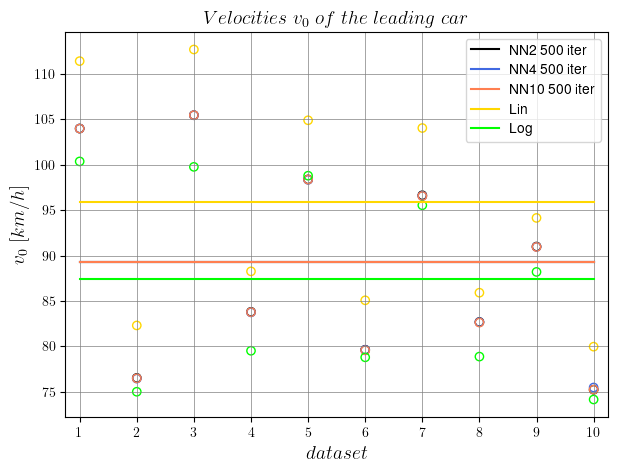

In [27]:
# Initialize the figure
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

ms2kmh = 3.6

palette = ['black', 'royalblue', 'coral']
lin_color, log_color = 'gold', 'lime'

## NN model
for step, d in enumerate(DOE):   
        
    # get the right df
#     info_dataset = info_nn.loc[info_nn['DOE'].isin([d])]
    info_dataset = info_nn.loc[info_nn['DOE'].isin([str(d)])]
    color = palette[step]

    # For a dataset, plot v0 mean (averaging v0 mean in all the scenes)
    info_grouped = info_dataset.groupby(['N. file']).mean(numeric_only=True)
    for nf, p in info_grouped.iterrows():
        ax.scatter(nf, p['v0_scn_mean']*ms2kmh, facecolors='none', edgecolors=color)

    # Plot v0 mean over all dfs
    alldfs = [a for a, _ in info_grouped.iterrows()]
    v0_mean_alldfs = info_grouped['v0_scn_mean'].mean()*ms2kmh
    label = "NN" + str(d[1]) + f" {NUM_ITER} iter"
    ax.plot(alldfs, [v0_mean_alldfs]*len(alldfs), color = color, label=label)
    

## LIN LOG
for key, grp in info_linlog.groupby(['LWR_flag','N. file']):
    tmp = grp.mean(numeric_only=True)
    nf = key[1]
    match key[0]:
        case 'Lin':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=lin_color)
        case 'Log':
            ax.scatter(nf, tmp['v0_scn']*ms2kmh, facecolors='none', edgecolors=log_color)

for key, grp in info_linlog.groupby('LWR_flag'):
    tmp = grp.mean(numeric_only=True)
    
    xrange = [i for i in range(1,11)]
    yval = [tmp['v0_scn']*ms2kmh] * len(xrange) 
    match key:
        case 'Lin':
            ax.plot(xrange, yval, color = lin_color, label = key)
        case 'Log':
            ax.plot(xrange, yval, color = log_color,  label = key)


ax.set_xlabel(r"$data set$",fontsize=14)
ax.set_ylabel(r"$v_{0}\ [km/h]$",fontsize=14)
ax.set_title(fr"$Velocities\ v_{0}\ of\ the\ leading\ car$",fontsize=14)

xlim = [0.75,10.25]
ax.set_xlim(xlim)
ax.set_xticks(range(1,11))
ylim = ax.get_ylim()

ax.legend()
ax.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

## Table

In [28]:
info_linlog.groupby(['LWR_flag','N. file']).mean(numeric_only=True)[['L_scn']]

L_scn
LWR_flag N. file          
Lin      1        2.770635
         2        4.535137
         3        3.686358
         4        4.327962
         5        2.871643
         6        4.250602
         7        3.920476
         8        6.100666
         9        3.513691
         10       4.450333
Log      1        7.838764
         2        8.270710
         3        8.793942
         4        8.938145
         5        7.343976
         6        7.284340
         7        7.639100
         8        9.384775
         9        7.492773
         10       7.177346

In [29]:
for flag, grp in info_linlog.groupby('LWR_flag'):
    print(f"For {flag}-model: the average for L is {grp['L_scn'].mean()}")

For Lin-model: the average for L is 4.024930469481387
For Log-model: the average for L is 8.115848796709274


## Prepare the out dir

In [30]:
# Create the directory..
if flag_save:
    
    ext = ".svg"
    
    # Create directory where to save the image
    now = datetime.now() 
    d = now.strftime(f"%Y-%m-%d_%H-%M-%S_all")
    
    path = 'out/' + d
    os.mkdir(path)

In [31]:
# Save figure
if flag_save:

    title = f"/v0_plot"     
    fig.savefig(path+title+ext, bbox_inches='tight')